# EDA (Exploratory Data Analysis)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings


In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Get the current working directory
current_dir = os.getcwd()
# Move up one level from the current directory
parent_dir = os.path.dirname(current_dir)
# Read the dataset
df = pd.read_csv(os.path.join(parent_dir, 'dataset', 'clean_data.csv'))

In [4]:
df.dtypes

Unnamed: 0            int64
id                    int64
date_review          object
day_review            int64
month_review         object
month_review_num      int64
year_review           int64
verified               bool
name                 object
month_fly            object
month_fly_num       float64
year_fly            float64
month_year_fly       object
country              object
aircraft             object
type                 object
seat_type            object
route                object
seat_comfort        float64
cabit_serv          float64
food                float64
ground_service      float64
wifi                float64
money_value           int64
recommended          object
review               object
dtype: object

In [5]:
df.month_year_fly =  pd.to_datetime(df['month_year_fly'])
df.date_review = pd.to_datetime(df['date_review'])

In [6]:
df.dtypes

Unnamed: 0                   int64
id                           int64
date_review         datetime64[ns]
day_review                   int64
month_review                object
month_review_num             int64
year_review                  int64
verified                      bool
name                        object
month_fly                   object
month_fly_num              float64
year_fly                   float64
month_year_fly      datetime64[ns]
country                     object
aircraft                    object
type                        object
seat_type                   object
route                       object
seat_comfort               float64
cabit_serv                 float64
food                       float64
ground_service             float64
wifi                       float64
money_value                  int64
recommended                 object
review                      object
dtype: object

In [7]:
df.head()

,Unnamed: 0,id,date_review,day_review,month_review,month_review_num,year_review,verified,name,month_fly,...,seat_type,route,seat_comfort,cabit_serv,food,ground_service,wifi,money_value,recommended,review
0,0,0,2024-03-05,5,March,3,2024,True,I Carsen,March,...,Business Class,Singapore to Sydney,1.0,1.0,2.0,3.0,NaN,2,no,The worst business class experience. Ground cr...
1,3,1,2024-03-04,4,March,3,2024,True,E Gayerlo,March,...,Business Class,London Heathrow to Mexico City,2.0,2.0,1.0,2.0,1.0,1,no,"On the my trip to Mexico City, I had the oppor..."
2,1,2,2024-03-04,4,March,3,2024,False,L Kelly,February,...,Business Class,Cyprus to London,1.0,3.0,NaN,3.0,1.0,1,no,Quite possibly the worst business class I have...
3,2,3,2024-03-04,4,March,3,2024,False,Jana Chua,March,...,Economy Class,Singapore to Auckland via Sydney,2.0,3.0,3.0,1.0,1.0,1,no,I will never be flying with BA again. This is ...
4,4,4,2024-03-02,2,March,3,2024,True,T Collins,February,...,Business Class,Heathrow to Oslo,4.0,5.0,5.0,5.0,NaN,5,yes,I upgraded at check in to Club Europe seat 1D ...


## General Analysis

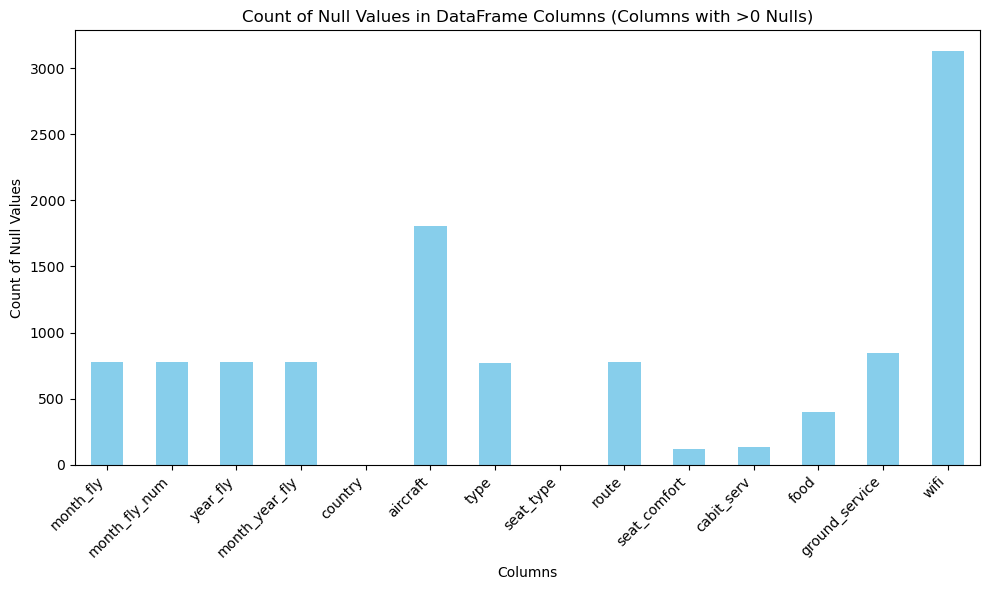

In [8]:
# Count null values in each column
null_counts = df.isnull().sum()

# Filter columns with more than zero null values
null_counts_gt_zero = null_counts[null_counts > 0]

# Plotting the null counts
plt.figure(figsize=(10, 6))
null_counts_gt_zero.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values in DataFrame Columns (Columns with >0 Nulls)')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

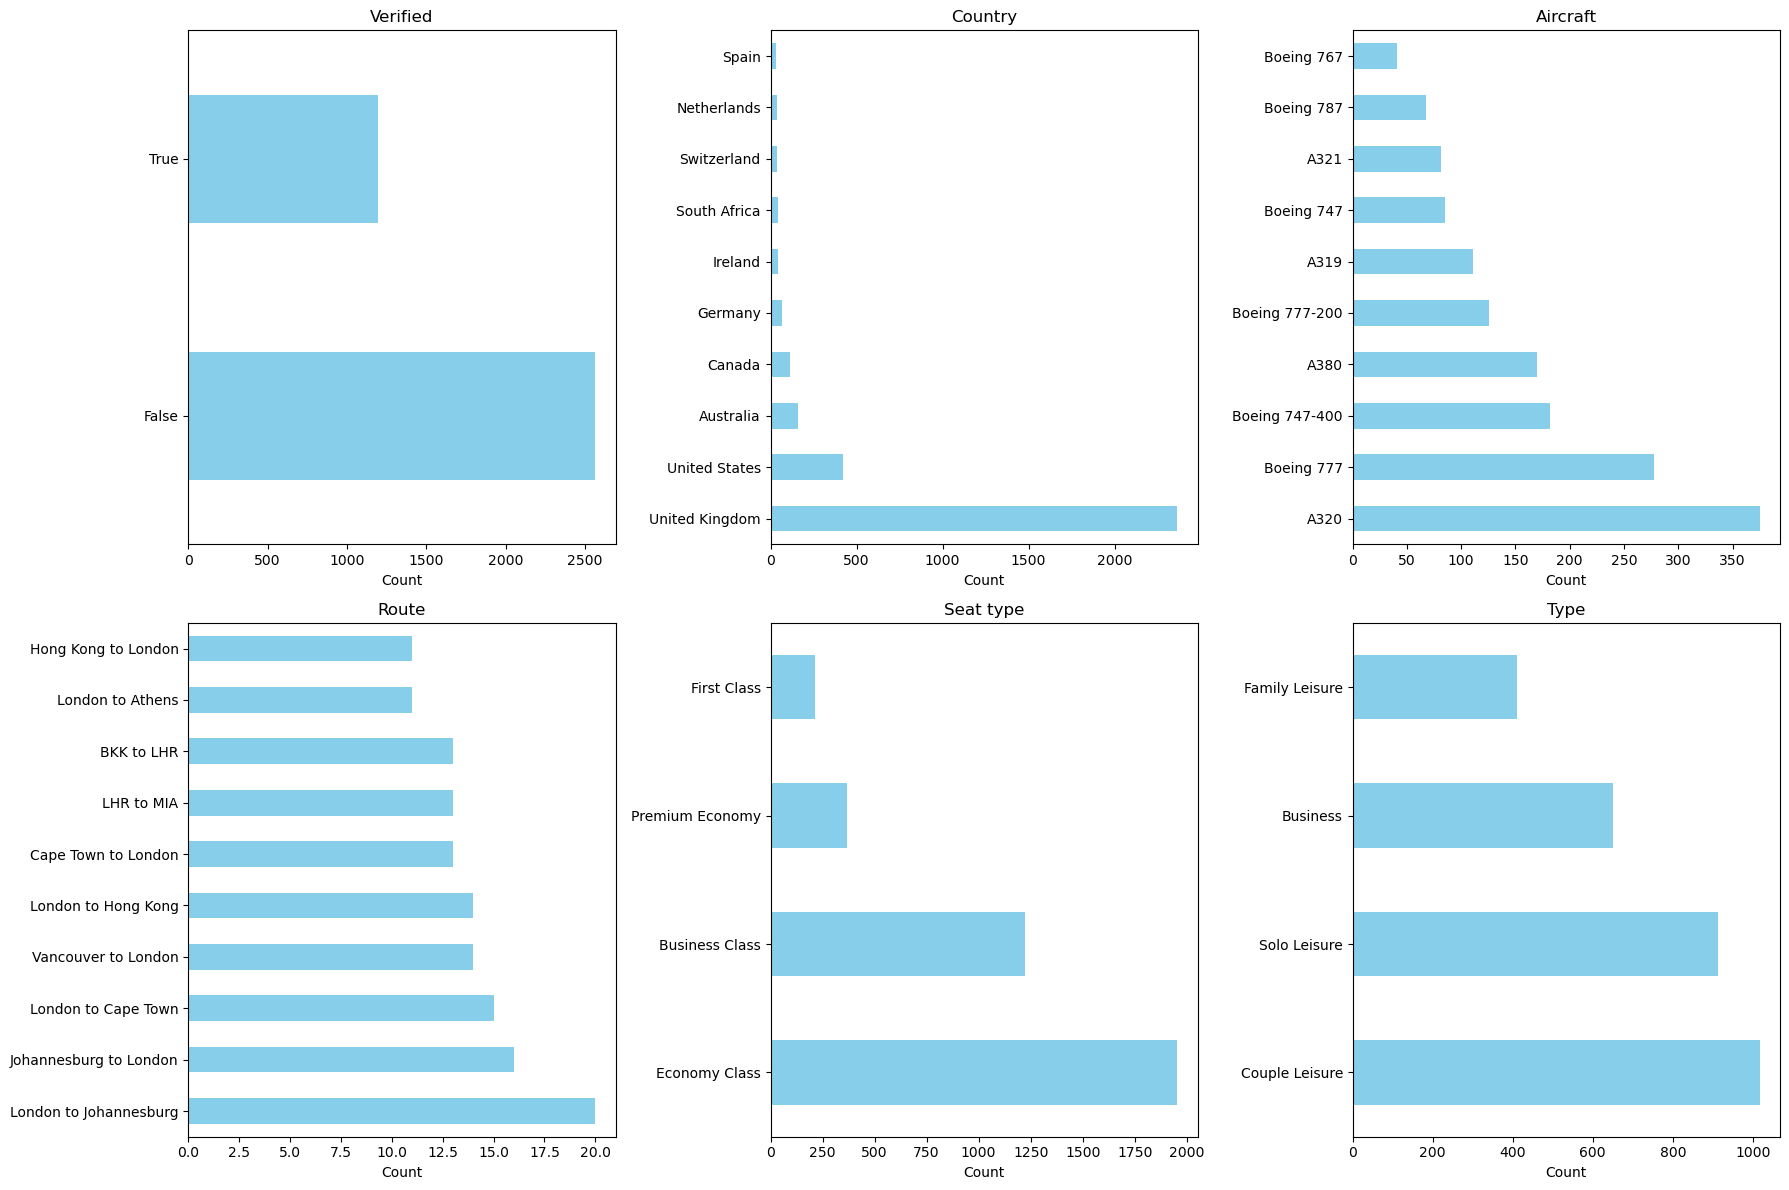

In [9]:
# List of columns to plot
columns_to_plot = ['verified', 'country', 'aircraft', 'route', 'seat_type', 'type']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Adjusted the subplot grid size

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(columns_to_plot):
    # Exclude NaN values
    filtered_data = df[column].dropna()
    
    # Count occurrences of each value and select top 10
    top_10_counts = filtered_data.value_counts().head(10).sort_values(ascending=True)
    
    # Plot the data
    top_10_counts.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Add titles and labels
    axes[i].set_title(column.capitalize().replace('_', ' '))
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')
    axes[i].invert_yaxis()  # Invert y-axis to display highest count at the top

# Hide the remaining subplots if the number of columns to plot is less than the total number of subplots
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

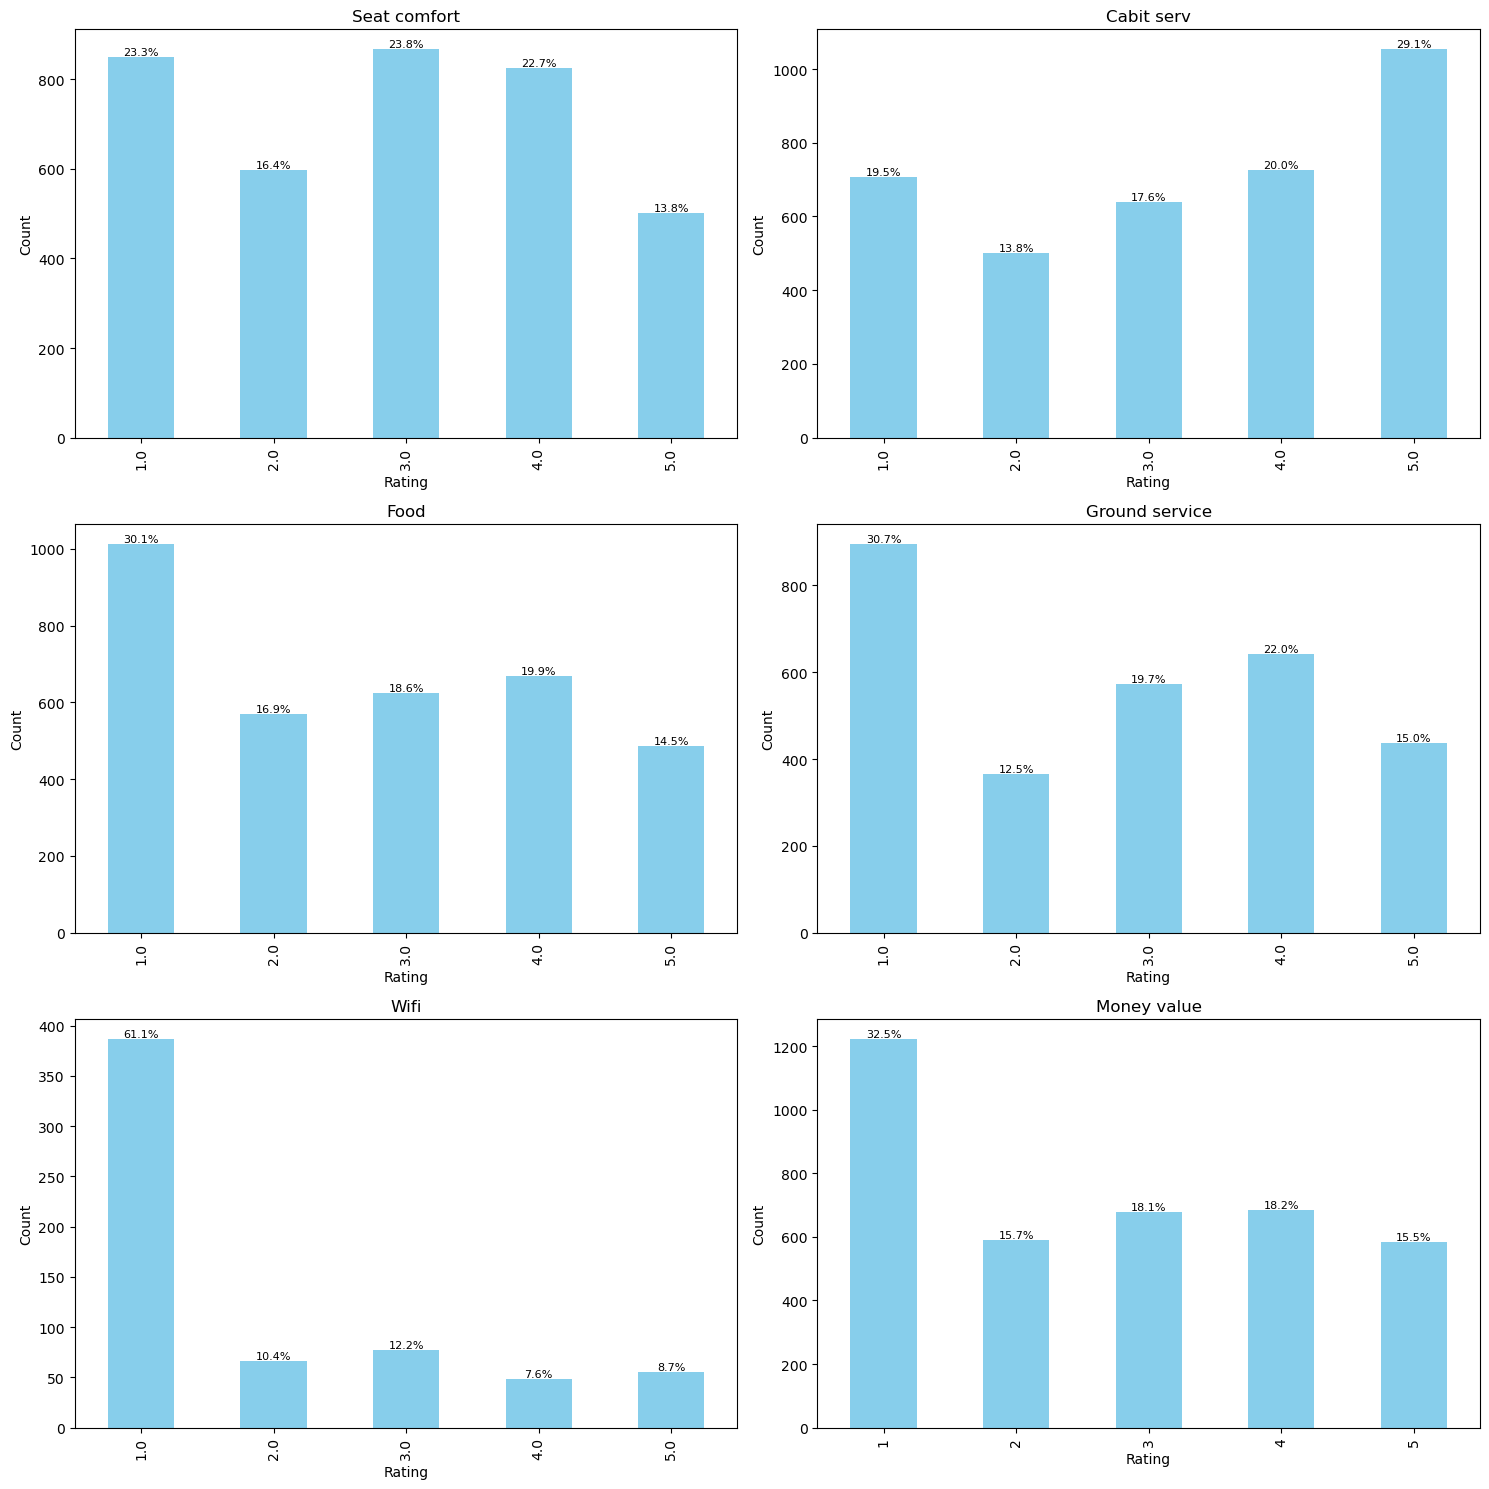

In [10]:
# Define the list of columns
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(columns):
    # Exclude 0 values for 'food' and 'money_value' columns
    if column in ['food', 'money_value']:
        filtered_data = df[df[column] > 0]
        counts = filtered_data[column].value_counts().sort_index()
    else:
        counts = df[column].value_counts().sort_index()
    
    # Plot the data vertically
    counts.plot(kind='bar', ax=axes[i], color='skyblue')
    
    # Add titles and labels
    axes[i].set_title(column.capitalize().replace('_', ' '))
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Count')
    
    # Calculate percentage of total
    total_count = counts.sum()
    for j, (index, value) in enumerate(counts.items()):
        # Add percentage above the bar
        percentage = '{:.1f}%'.format(100 * value / total_count)
        axes[i].text(j, value, percentage, ha='center', va='bottom', color='black', fontsize=8)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [11]:
# Define the list of columns
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Create a DataFrame to store the summary statistics
summary_df = pd.DataFrame(summary_statistics)
summary_df

,seat_comfort,cabit_serv,food,ground_service,wifi,money_value
count,3642.000000,3630.000000,3362.000000,2914.000000,633.000000,3762.000000
mean,2.870675,3.253168,2.715645,2.780714,1.922591,2.684742
std,1.363197,1.489038,1.440495,1.459239,1.347294,1.470991
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Score Analysis

In [12]:
# Calculate the average score (Assume the weight is equal)
df['score'] = df[['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi']].mean(axis=1)


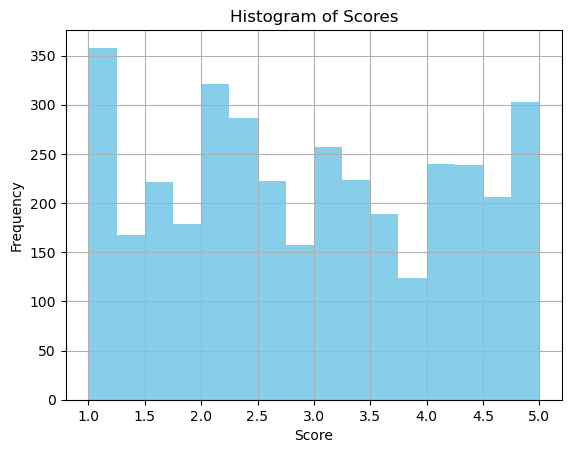

In [13]:
# Plot histogram of scores
df['score'].hist(bins=16, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

In [14]:
score_summary = df['score'].describe()

# Print the summary statistics
print("Summary Statistics for the 'Score' column:")
print(score_summary)

Summary Statistics for the 'Score' column:
count    3694.000000
mean        2.877409
std         1.219479
min         1.000000
25%         1.800000
50%         2.750000
75%         4.000000
max         5.000000
Name: score, dtype: float64


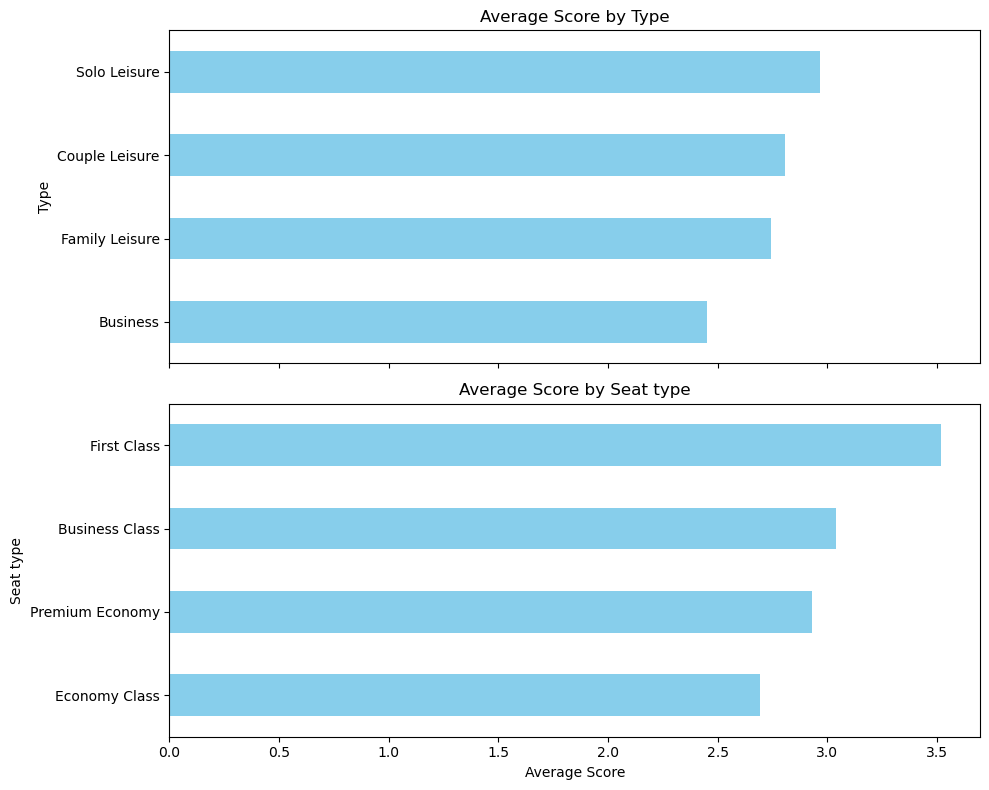

In [15]:
# List of columns to analyze
columns_to_analyze = ['type', 'seat_type']

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze), figsize=(10, 8), sharex=True)

# Iterate over each column and plot
for i, column in enumerate(columns_to_analyze):
    # Group by the column and calculate the mean score
    average_score_by_category = df.groupby(column)['score'].mean().sort_values()
    
    # Plot the average score for each category
    average_score_by_category.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Set title and labels
    axes[i].set_title(f'Average Score by {column.replace("_", " ").capitalize()}')
    axes[i].set_ylabel(column.replace("_", " ").capitalize())
    axes[i].set_xlabel('Average Score')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [16]:
def plot_significant_bar(df, column_name, title, review_count_threshold):
    # Filter the DataFrame to include only countries with count > review_count_threshold
    filtered_df = df.groupby(column_name).filter(lambda x: len(x) > review_count_threshold)

    # Calculate the average score for each category in the specified column
    average_score_by_category = filtered_df.groupby(column_name)['score'].mean().sort_values()

    # Plot the average score for each category using a bar chart
    plt.figure(figsize=(20, 10))

    # Use subplot with adjustable box to enable scrolling
    plt.subplot(111, aspect='auto')
    plt.barh(average_score_by_category.index, average_score_by_category, color='skyblue')
    plt.xlabel('Average Score')
    plt.ylabel(column_name)
    plt.title(f'Average Score by {title} that have number of review> {review_count_threshold}')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest average score at the top
    plt.tight_layout()

    # Enable interactive scrolling
    plt.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.1)
    plt.show()

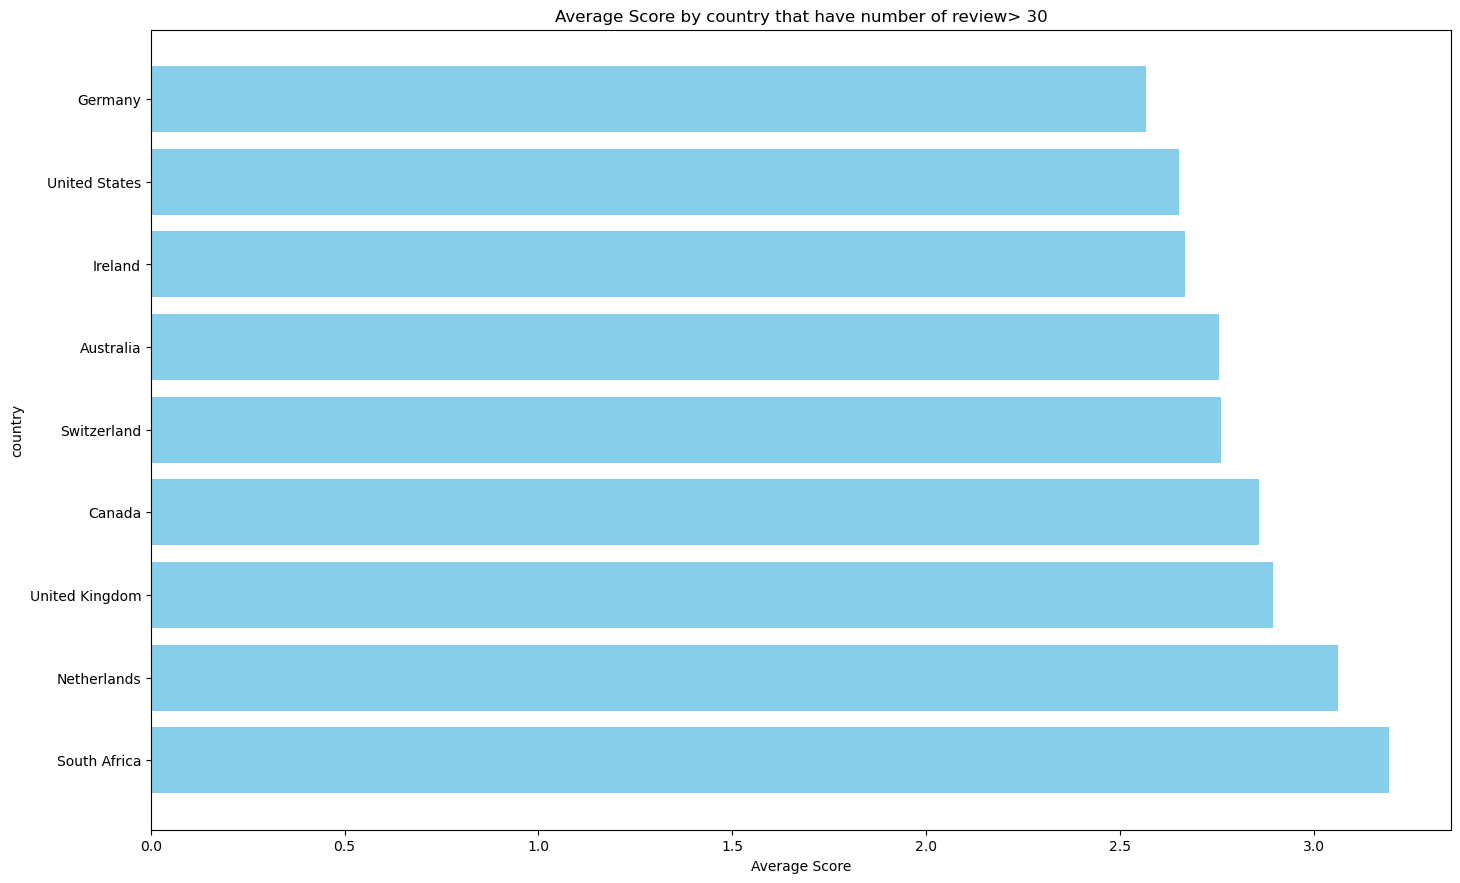

In [17]:
plot_significant_bar(df, "country", "country", 30)

## Service Analysis 

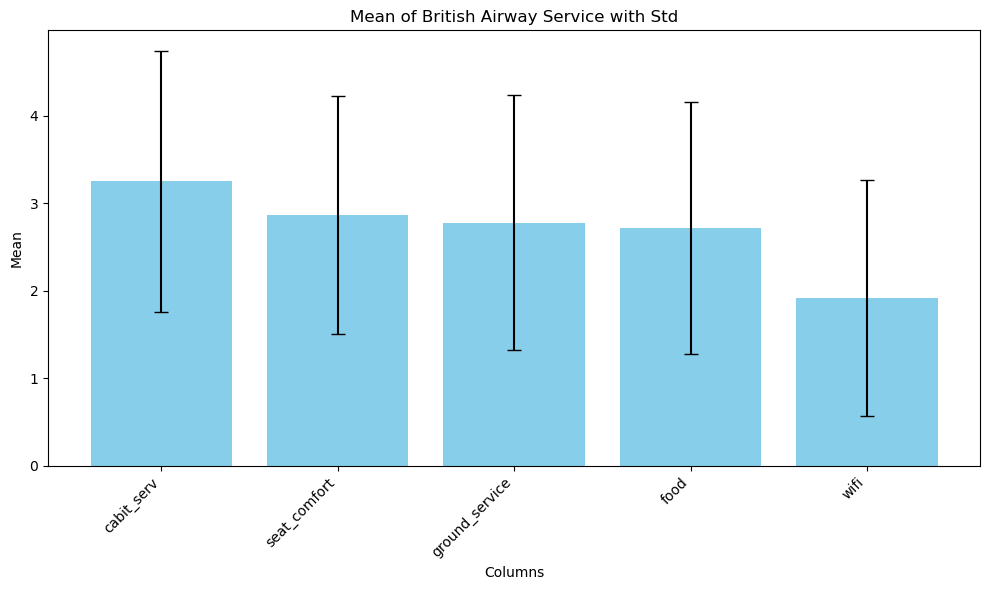

In [18]:
# Define the list of columns
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Extract the mean values and standard deviations for each column
means = [summary_statistics[column]['mean'] for column in columns]
stds = [summary_statistics[column]['std'] for column in columns]

# Sort the means and columns in descending order
sorted_means, sorted_columns = zip(*sorted(zip(means, columns), reverse=True))
sorted_stds = [summary_statistics[column]['std'] for column in sorted_columns]

# Plot the means of each column in descending order with error bars
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_means, color='skyblue', yerr=sorted_stds, capsize=5)  # Add error bars with std
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.title('Mean of British Airway Service with Std')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


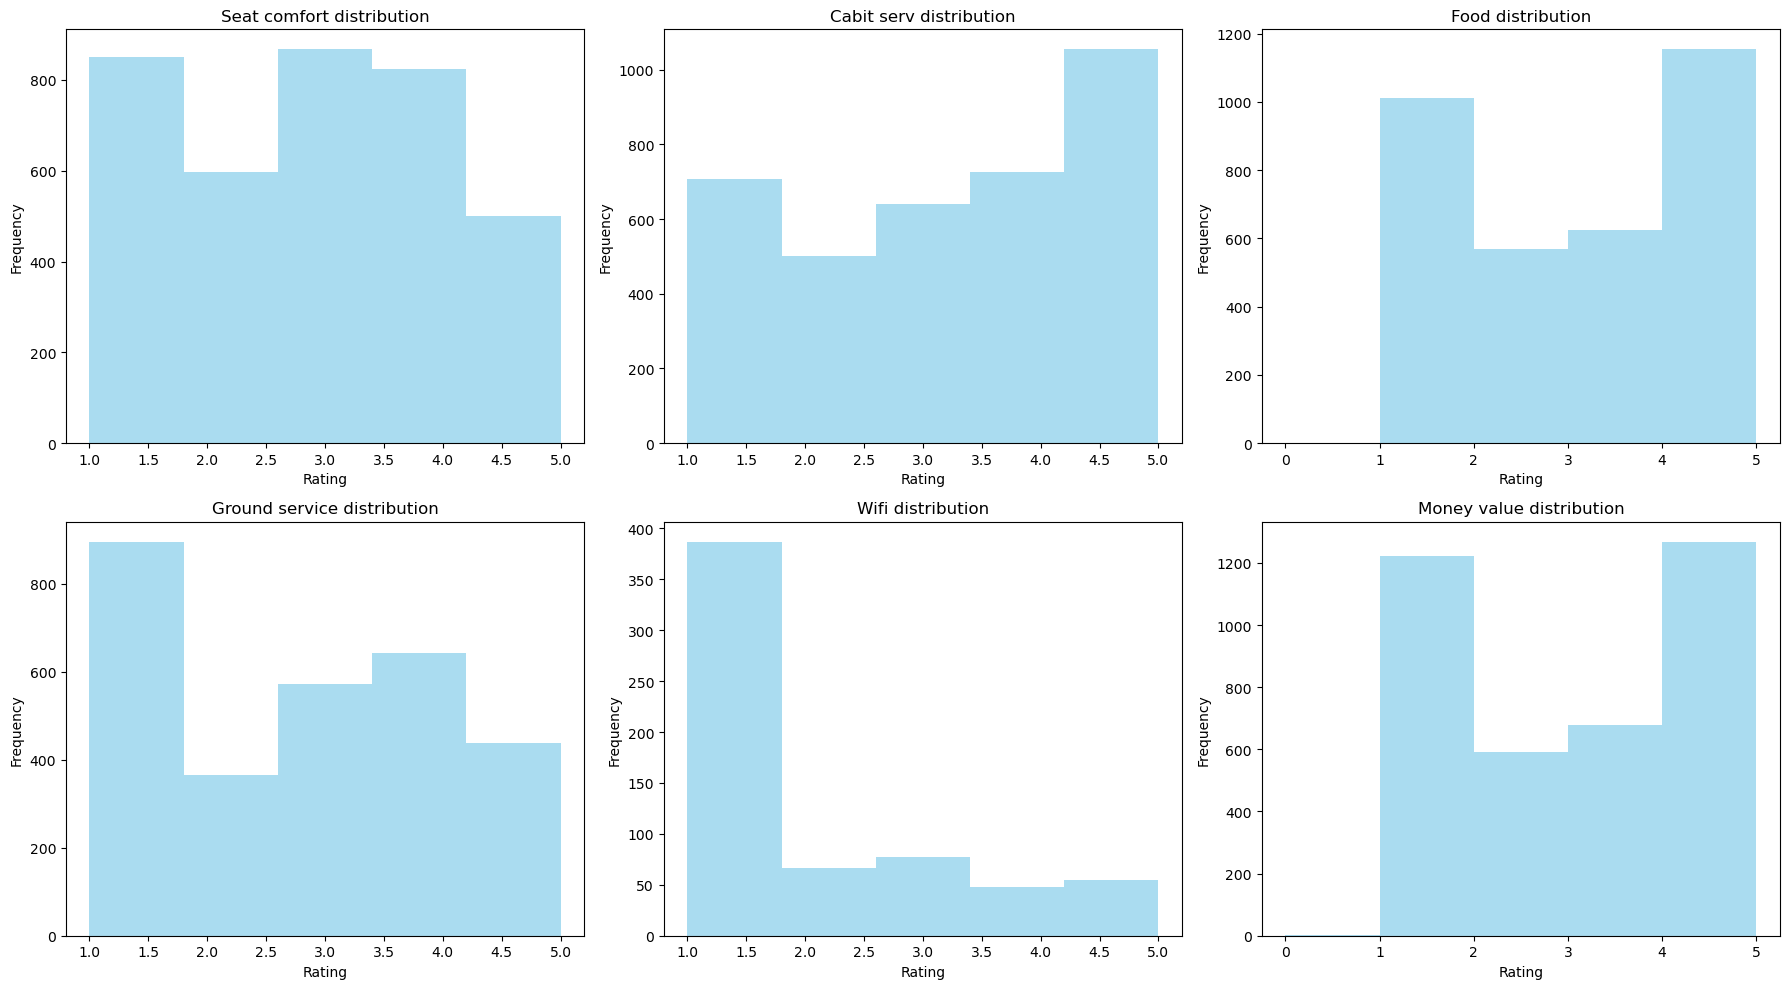

In [19]:
# Define columns of interest
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot histograms
for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=5, color='skyblue', alpha=0.7)
    axes[i].set_title(column.replace("_", " ").capitalize() + ' distribution')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


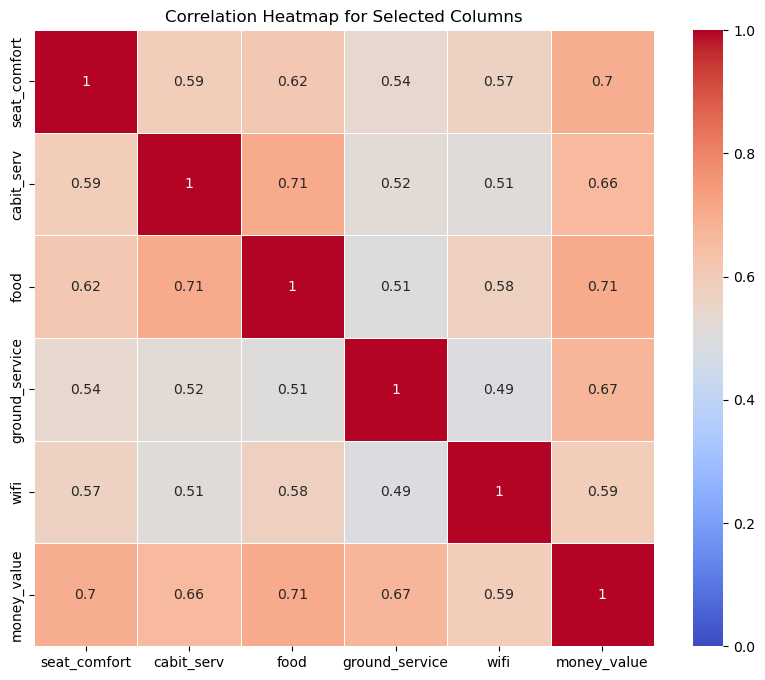

In [20]:
# Select only the columns of interest
df_selected = df[columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Create a heatmap with color scale from 0 to 1
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

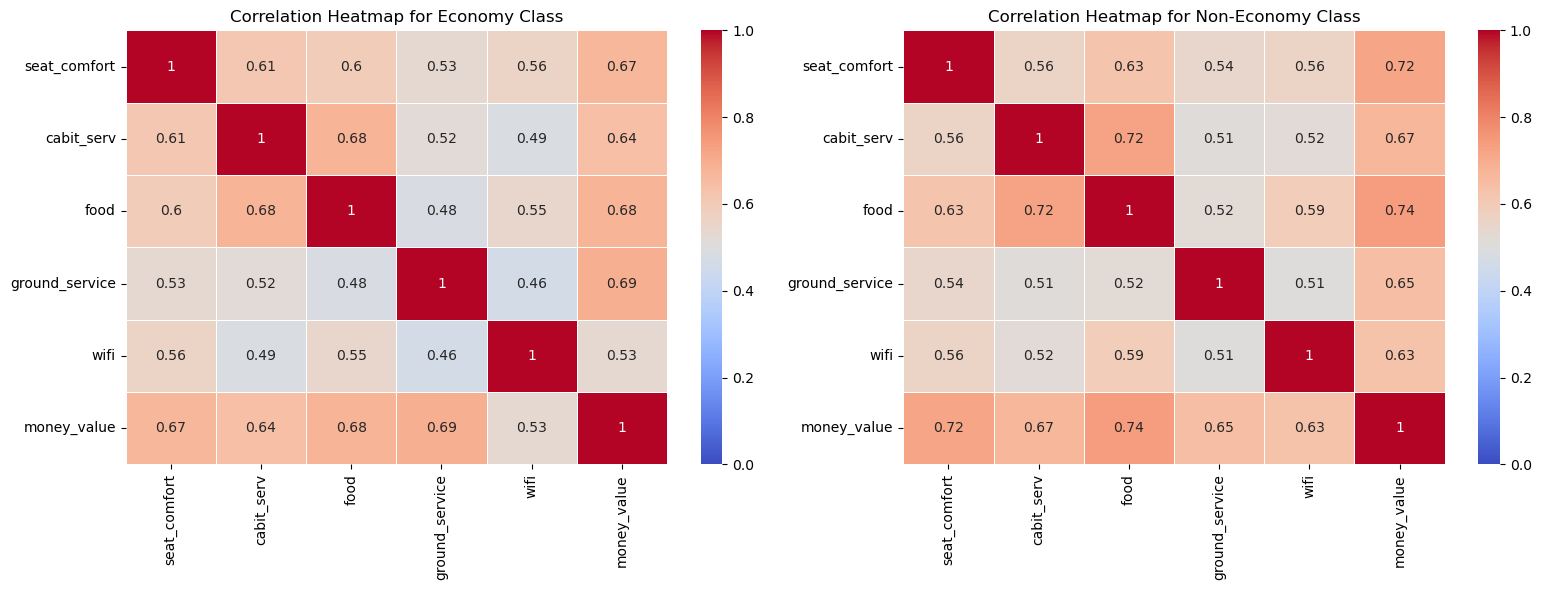

In [21]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Iterate over seat types
for idx, seat_type in enumerate(['Economy Class', 'Non-Economy Class']):
    # Filter the DataFrame based on seat type
    if seat_type == 'Economy Class':
        df_filtered = df[df['seat_type'] == 'Economy Class']
    else:
        df_filtered = df[df['seat_type'] != 'Economy Class']

    # Select only the columns of interest
    df_selected = df_filtered[columns]

    # Calculate the correlation matrix
    corr_matrix = df_selected.corr()

    # Create a heatmap with color scale from 0 to 1
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1, ax=axes[idx])
    title = f'Correlation Heatmap for {seat_type}'
    axes[idx].set_title(title)

plt.tight_layout()
plt.show()

In [22]:
### top 2 most important factos is food/beverages and Seat comfort for non economy seat type, for economy, it's the gound service that matter the most. We will vaildate this using feature engineering in the MoneyValueModel

### Ground Experience (economy class)

In [23]:
# Let's check the bad experience about the ground service from the economy class

In [24]:
## Filter out people in the Economy Class that have bad ground service experience
economy_df = df.loc[(df['seat_type'] == 'Economy Class')&(df['ground_service'] <= 2)]

In [25]:
economy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 3 to 2974
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        759 non-null    int64         
 1   id                759 non-null    int64         
 2   date_review       759 non-null    datetime64[ns]
 3   day_review        759 non-null    int64         
 4   month_review      759 non-null    object        
 5   month_review_num  759 non-null    int64         
 6   year_review       759 non-null    int64         
 7   verified          759 non-null    bool          
 8   name              759 non-null    object        
 9   month_fly         758 non-null    object        
 10  month_fly_num     758 non-null    float64       
 11  year_fly          758 non-null    float64       
 12  month_year_fly    758 non-null    datetime64[ns]
 13  country           759 non-null    object        
 14  aircraft          303 non-null

In [26]:
economy_df = economy_df[['verified', 'month_fly', 'month_fly_num', 'year_fly',
       'month_year_fly', 'country', 'type', 'route', 'ground_service',
       'money_value', 'recommended', 'review']]

In [27]:
# economy_df.reset_index(drop = True)
economy_df.head()

,verified,month_fly,month_fly_num,year_fly,month_year_fly,country,type,route,ground_service,money_value,recommended,review
3,False,March,3.0,2024.0,2024-03-01,Singapore,Solo Leisure,Singapore to Auckland via Sydney,1.0,1,no,I will never be flying with BA again. This is ...
6,True,February,2.0,2024.0,2024-02-01,United Kingdom,Couple Leisure,London Heathrow to Lisbon,2.0,3,no,Poor from start to finish. Six months after pu...
10,False,February,2.0,2024.0,2024-02-01,United States,Couple Leisure,Phoenix to Lisbon via London,1.0,1,no,We have flown BA five times from western USA t...
11,True,February,2.0,2024.0,2024-02-01,United Kingdom,Solo Leisure,London to Istanbul,2.0,2,no,London Heathrow to Istanbul at the start of th...
14,False,February,2.0,2024.0,2024-02-01,United Kingdom,Couple Leisure,London Heathrow to Casablanca,1.0,1,no,Another case of reviewing British Airways flig...


In [28]:
# Now, let's check their route so see where they are travelling from and to

In [29]:
def clean_route(df):
    """
    Clean the 'route' column of the DataFrame and split it into 'origin', 'destination', and 'transit' columns.

    Parameters:
    df (DataFrame): DataFrame containing a 'route' column.

    Returns:
    DataFrame: DataFrame with 'origin', 'destination', and 'transit' columns.
    """
    df = df.dropna(subset=['route'])
    # Function to split the route into origin, destination, and transit
    def split_route(route):
        parts = route.split(' to ')
        origin = parts[0]
        if len(parts) > 1:
            destination, transit = parts[1].split(' via ') if ' via ' in parts[1] else (parts[1], None)
        else:
            destination, transit = None, None
        return origin, destination, transit

    # Apply the function to create new columns
    df[['origin', 'destination', 'transit']] = df['route'].apply(split_route).apply(pd.Series)

    return df

economy_df = clean_route(economy_df)

In [30]:
# Replace 'LHR' and 'Heathrow' with 'London Heathrow'
economy_df['origin'] = economy_df['origin'].replace({'LHR': 'London Heathrow', 'Heathrow': 'London Heathrow'})
economy_df['destination'] = economy_df['destination'].replace({'LHR': 'London Heathrow', 'Heathrow': 'London Heathrow'})
economy_df['transit'] = economy_df['transit'].replace({'LHR': 'London Heathrow', 'Heathrow': 'London Heathrow'})


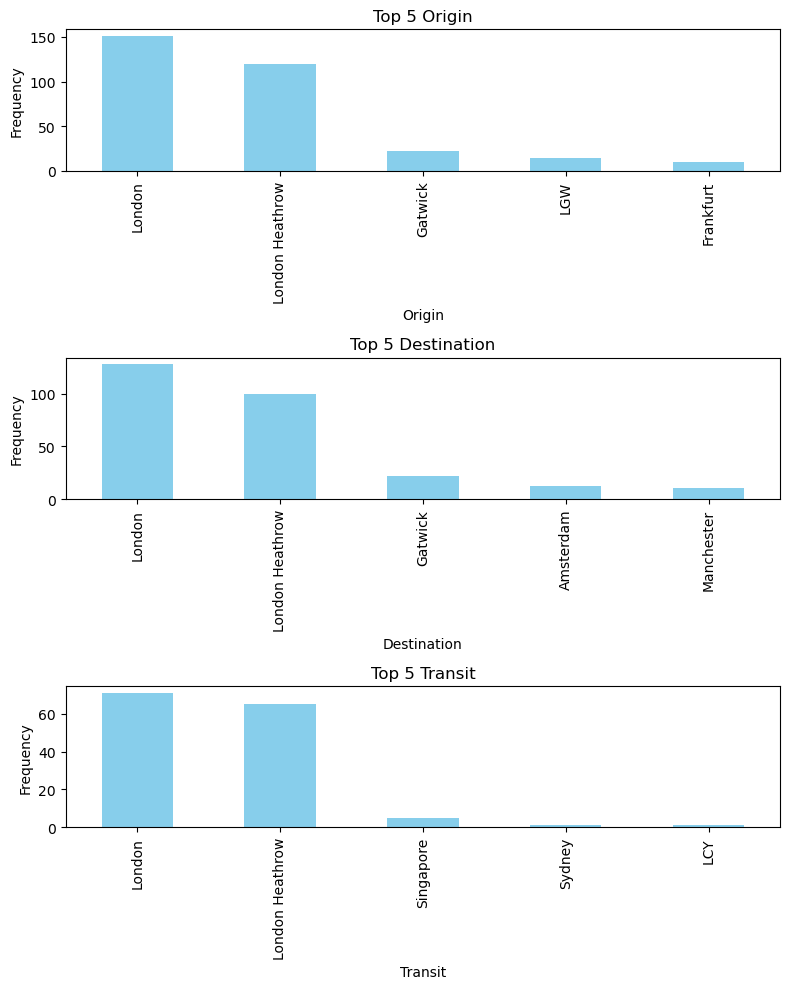

In [31]:
# Select only the top 5 values for each column
top_origins = economy_df['origin'].value_counts().head(5)
top_destinations = economy_df['destination'].value_counts().head(5)
top_transits = economy_df['transit'].value_counts().head(5)

# Plot the bar chart
fig, axes = plt.subplots(nrows=3, figsize=(8, 10))

for i, (column, top_values) in enumerate(zip(['origin', 'destination', 'transit'], [top_origins, top_destinations, top_transits])):
    # Plot the bar chart
    top_values.plot(kind='bar', ax=axes[i], color='skyblue')

    # Set title and labels
    axes[i].set_title(f'Top 5 {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [32]:
# So they are travelling and arriving mostly in London and especially the Heathrow airport

#### London/London Heathrow Analysis

In [33]:
#### filter out people that travel through london
london_filter = (economy_df['origin'].isin(['London', 'London Heathrow'])) | \
                (economy_df['destination'].isin(['London', 'London Heathrow'])) | \
                (economy_df['transit'].isin(['London', 'London Heathrow']))

# Apply the filter to the DataFrame
london_df = economy_df[london_filter]



In [34]:
london_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635 entries, 6 to 2974
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   verified        635 non-null    bool          
 1   month_fly       634 non-null    object        
 2   month_fly_num   634 non-null    float64       
 3   year_fly        634 non-null    float64       
 4   month_year_fly  634 non-null    datetime64[ns]
 5   country         635 non-null    object        
 6   type            634 non-null    object        
 7   route           635 non-null    object        
 8   ground_service  635 non-null    float64       
 9   money_value     635 non-null    int64         
 10  recommended     635 non-null    object        
 11  review          635 non-null    object        
 12  origin          635 non-null    object        
 13  destination     635 non-null    object        
 14  transit         150 non-null    object        
dtypes: bool(1)

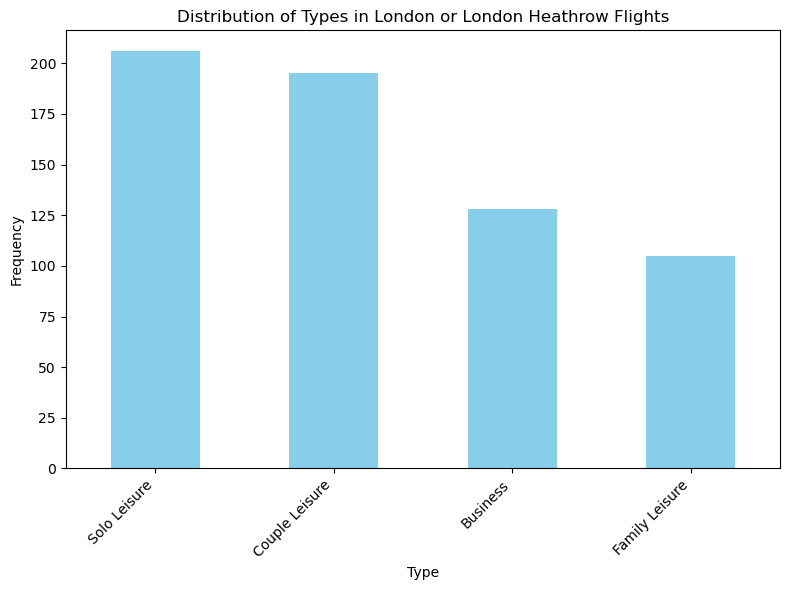

In [35]:
# Count the occurrences of each type
type_counts = london_df['type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color='skyblue')

# Set title and labels
plt.title('Distribution of Types in London or London Heathrow Flights')
plt.xlabel('Type')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [36]:
# mostly solo people and couple so they will need lots of assitant

In [37]:
def filter_reviews_and_percentage(df, word='staff'):
    """
    Filter the DataFrame to contain only the reviews containing the specified word.
    Print out the percentage of reviews containing the specified word.

    Args:
    - df: DataFrame containing the 'review' column.
    - word: The word to search for in the 'review' column. Default is 'food'.

    Returns:
    - DataFrame containing only the reviews containing the specified word.
    """

    # Filter the DataFrame to contain only the reviews containing the specified word
    filtered_df = df[df['review'].str.contains(word, case=False)]

    # Calculate the percentage of reviews containing the specified word
    total_reviews = len(df)
    reviews_with_word = len(filtered_df)
    percentage = (reviews_with_word / total_reviews) * 100

    # Print out the percentage
    print(f"Percentage of reviews containing the word '{word}': {percentage:.2f}%")

    # Return the filtered DataFrame
    return filtered_df

# Example usage:
# Assuming df is your DataFrame containing the 'review' column

In [38]:
london_df.to_csv(os.path.join(parent_dir, 'dataset', 'london_airport.csv'))

In [40]:
staff_df = filter_reviews_and_percentage(london_df, 'staff')
staff_df.to_csv(os.path.join(parent_dir, 'dataset', 'bad_staff.csv'))

Percentage of reviews containing the word 'staff': 34.80%


### Plane Experience (non-economy class)

#### Food Analysis

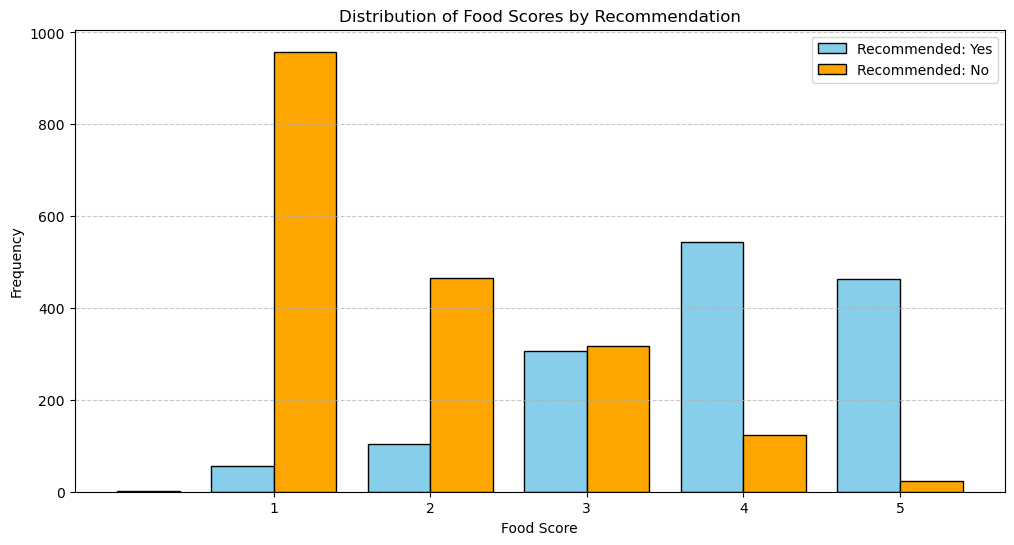

In [41]:
# Filter the DataFrame for recommended == 'Yes' and recommended == 'No'
recommended_yes = df[df['recommended'] == 'yes']['food'].value_counts().sort_index()
recommended_no = df[df['recommended'] == 'no']['food'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))

# Plotting recommended == 'Yes'
plt.bar(recommended_yes.index - 0.2, recommended_yes.values, width=0.4, color='skyblue', label='Recommended: Yes', edgecolor='black')

# Plotting recommended == 'No'
plt.bar(recommended_no.index + 0.2, recommended_no.values, width=0.4, color='orange', label='Recommended: No', edgecolor='black')

# Add labels and title
plt.title('Distribution of Food Scores by Recommendation')
plt.xlabel('Food Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming scores range from 1 to 5

# Show the bar chart
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

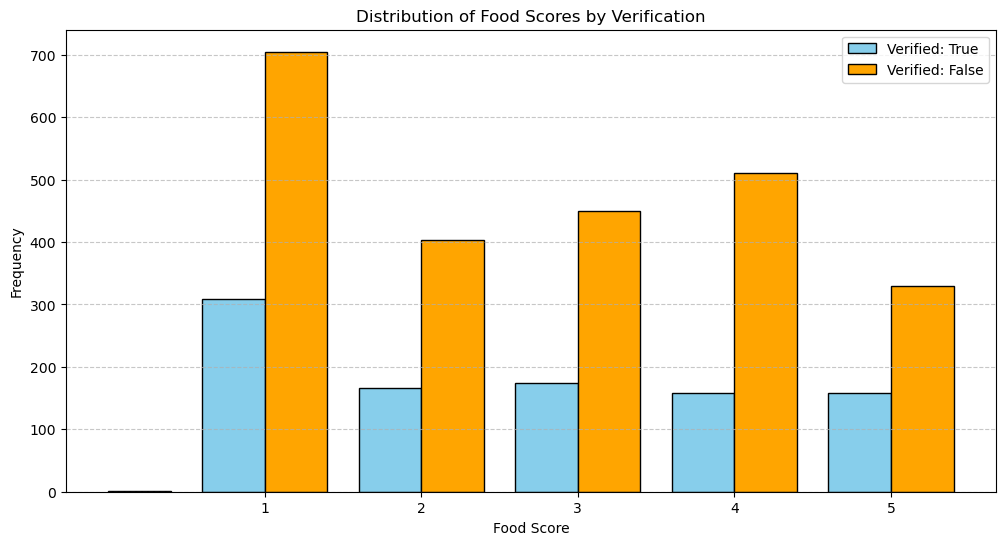

In [42]:
# Filter the DataFrame for verified == True and verified == False
verified_true = df[df['verified'] == True]['food'].value_counts().sort_index()
verified_false = df[df['verified'] == False]['food'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))

# Plotting verified == True
plt.bar(verified_true.index - 0.2, verified_true.values, width=0.4, color='skyblue', label='Verified: True', edgecolor='black')

# Plotting verified == False
plt.bar(verified_false.index + 0.2, verified_false.values, width=0.4, color='orange', label='Verified: False', edgecolor='black')

# Add labels and title
plt.title('Distribution of Food Scores by Verification')
plt.xlabel('Food Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming scores range from 1 to 5

# Show the bar chart
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [66]:
# Distribution for food are the same between Verified and non-verified

In [67]:
## Filter out people in the Economy Class that have bad ground service experience
food_df = df.loc[(df['seat_type'] != 'Economy Class')&(df['food'] <= 2)]

In [44]:
food_df = food_df[['verified','month_year_fly','country', 'aircraft','type','food','money_value', 'recommended', 'review']]

In [45]:
food_df.dropna(subset=['food'])
food_df.shape

(711, 9)

In [46]:
food_df.head()

,verified,month_year_fly,country,aircraft,type,food,money_value,recommended,review
0,True,2024-03-01,Australia,Boeing 777-300,Business,2.0,2,no,The worst business class experience. Ground cr...
1,True,2024-03-01,United Kingdom,Boeing 787,Couple Leisure,1.0,1,no,"On the my trip to Mexico City, I had the oppor..."
13,True,2023-11-01,United States,A380,Solo Leisure,1.0,1,no,I am a British Airways Gold Guest List member ...
21,True,2023-12-01,United Kingdom,NaN,Family Leisure,2.0,2,no,Stinking nappies being changed in business cab...
27,False,2024-01-01,United Kingdom,NaN,Family Leisure,1.0,1,no,Paid for business class travelling Cairo to Lo...


In [47]:
food_df.groupby('recommended')['recommended'].count()

recommended
no     648
yes     63
Name: recommended, dtype: int64

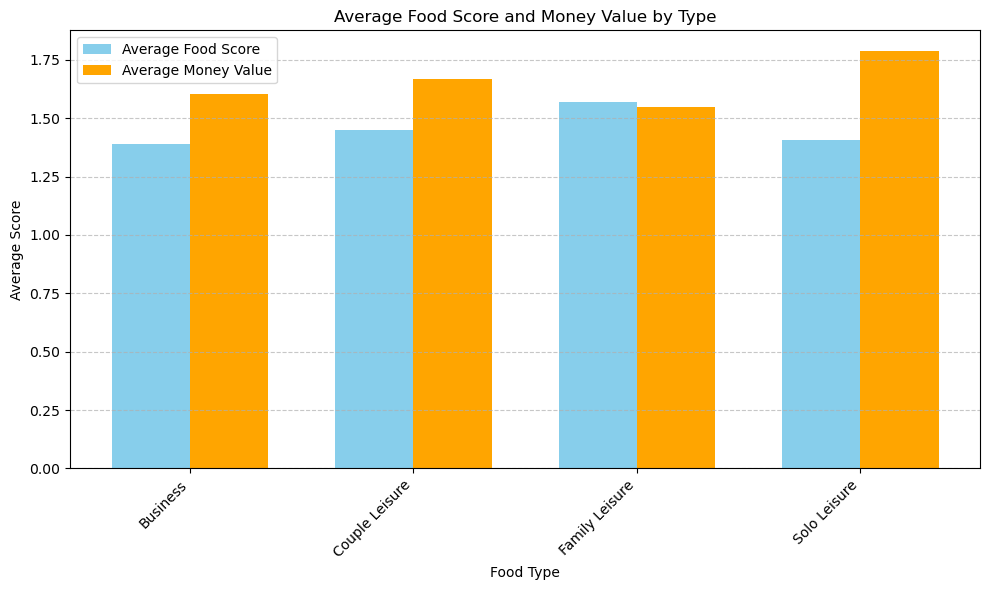

In [71]:
# Group by 'type' and calculate the average food score and money value
average_scores = food_df.groupby('type').agg({'food': 'mean', 'money_value': 'mean'})

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Index for the x-axis
ind = range(len(average_scores))

# Plotting average food score
plt.bar(ind, average_scores['food'], bar_width, label='Average Food Score', color='skyblue')

# Plotting average money value
plt.bar([i + bar_width for i in ind], average_scores['money_value'], bar_width, label='Average Money Value', color='orange')

# Setting labels, title, and ticks
plt.xlabel('Food Type')
plt.ylabel('Average Score')
plt.title('Average Food Score and Money Value by Type')
plt.xticks([i + bar_width / 2 for i in ind], average_scores.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

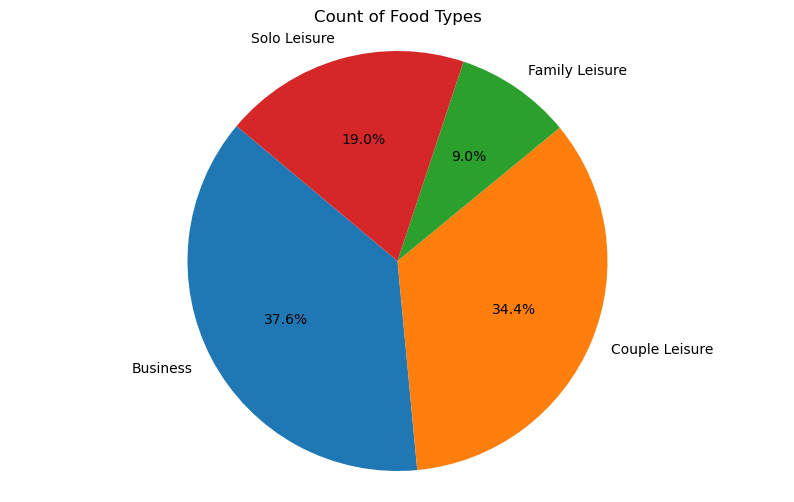

In [79]:
# Sample data
average_scores = food_df.groupby('type').agg({'food': 'count'})

# Plotting the pie chart for count only
plt.figure(figsize=(10, 6))

# Plotting pie chart
plt.pie(average_scores['food'], labels=average_scores.index, autopct='%1.1f%%', startangle=140)

# Setting title
plt.title('Count of Food Types')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

In [ ]:
# Mostly business and couple

In [49]:
bad_food_df = filter_reviews_and_percentage(food_df)
bad_food_df.to_csv(os.path.join(parent_dir, 'dataset', 'bad_food.csv'))

Percentage of reviews containing the word 'food': 57.67%


#### Seat Comfort Analysis

In [50]:
## Filter out people in the Economy Class that have bad ground service experience
seat_df = df.loc[(df['seat_type'] != 'Economy Class')&(df['seat_comfort'] <= 2)]

In [51]:
seat_df = seat_df[['verified','month_year_fly','country', 'aircraft','type','seat_comfort','money_value', 'recommended', 'review']]

In [52]:
seat_df.dropna(subset=['seat_comfort'])
seat_df.shape

(632, 9)

In [53]:
def split_aircraft_column(df):
    # Split the 'aircraft' column by '/', then by '-', ',', and '&'
    split_aircraft = df['aircraft'].str.split('/|-|,|&', expand=True)
    
    # Rename the columns
    split_aircraft.columns = [f'aircraft_{i+1}' for i in range(split_aircraft.shape[1])]
    
    split_aircraft = split_aircraft[['aircraft_1','aircraft_2']]
    # Concatenate the split columns with the original DataFrame
    df = pd.concat([df, split_aircraft], axis=1)
    
    return df


In [54]:
seat_df = split_aircraft_column(seat_df)

In [55]:
def clean_aircraft(df, column_name):
    df[column_name] = df[column_name].str.replace(r'(?i)Boeing (\d+)', r'B\1', regex=True)
    df[column_name] = df[column_name].str.replace(r'(?i)777', 'B777')
    df[column_name] = df[column_name].str.replace(r'(?i)A(\d+)', r'A\1', regex=True)
    df[column_name] = df[column_name].str.replace(r'(?i)170', 'E170')
    df[column_name] = df[column_name].str.replace(r'(?i)190', 'E190')
    
    # # Extract 'A___' if present, else keep the same
    # df[column_name] = np.where(df[column_name].str.contains(r'(?i)A\d+'), df[column_name].str.extract(r'(?i)(A\d+)'), df[column_name])
    df[column_name] = df[column_name].str.extract(r'(?i)([A-Z]\d+)', expand=False)
    
    return df


In [56]:
def calculate_aircraft_score(df):
    # Accessing specific columns using [['column_name']]
    aircraft_1 = df[['aircraft_1', 'seat_comfort']]
    aircraft_2 = df[['aircraft_2', 'seat_comfort']]

    # Concatenating the DataFrames
    aircraft = pd.concat([aircraft_1, aircraft_2], axis=0)

    aircraft = aircraft[['aircraft_1', 'seat_comfort']]
    aircraft = aircraft.rename(columns={'aircraft_1': 'aircraft'})

    # Drop rows with NaN or NA values
    aircraft = aircraft.dropna()

    # Group by 'aircraft' and calculate count and average seat comfort
    summary = aircraft.groupby('aircraft').agg({'seat_comfort': ['count', 'mean']}).reset_index()
    summary.columns = ['aircraft', 'count', 'average_seat_comfort']

    # Sort DataFrame by count
    summary = summary.sort_values(by='count', ascending=False)

    # Create dual axes plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot count of aircraft on the first axis
    color = 'tab:blue'
    ax1.bar(summary['aircraft'], summary['count'], color=color, label='Count')
    ax1.set_xlabel('Aircraft')
    ax1.set_ylabel('Count', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create second axis for average seat comfort
    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.plot(summary['aircraft'], summary['average_seat_comfort'], color=color, marker='o', label='Average Seat Comfort')
    ax2.set_ylabel('Average Seat Comfort', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Title and legend
    plt.title('Count and Average Seat Comfort by Aircraft (Ordered by Count)')
    fig.tight_layout()
    plt.show()

    return aircraft


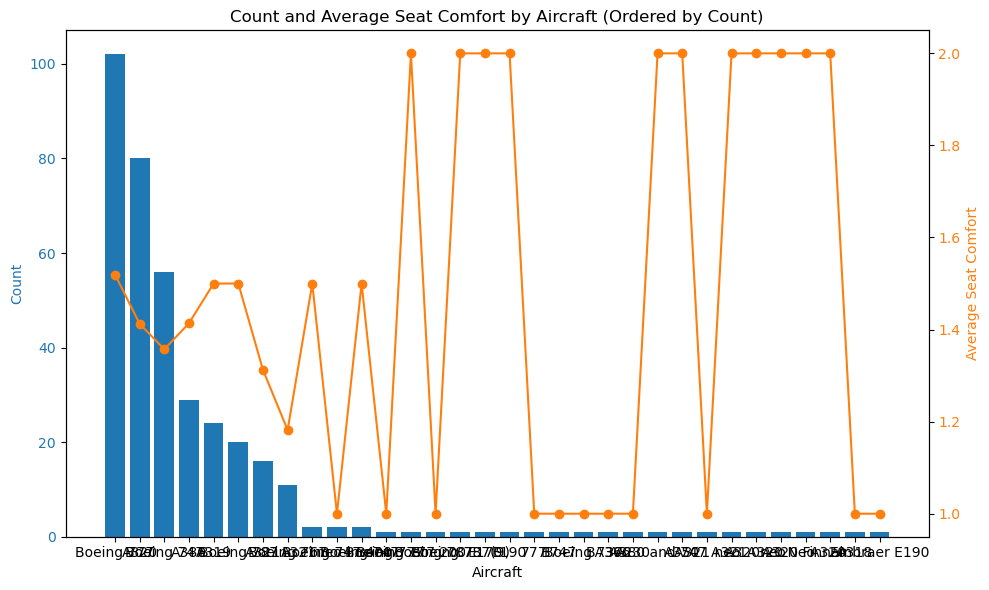

In [57]:
aircraft = calculate_aircraft_score(seat_df)

In [58]:
bad_seat_df = filter_reviews_and_percentage(seat_df, word = 'seat')

Percentage of reviews containing the word 'seat': 76.27%


In [59]:
bad_seat_df.to_csv(os.path.join(parent_dir, 'dataset', 'bad_seat.csv'))

## TIme Series Analysis

### General Time Time Series

In [60]:
# Convert 'Month Year Flown' column to datetime data type
df['month_year_fly'] = pd.to_datetime(df['month_year_fly'])

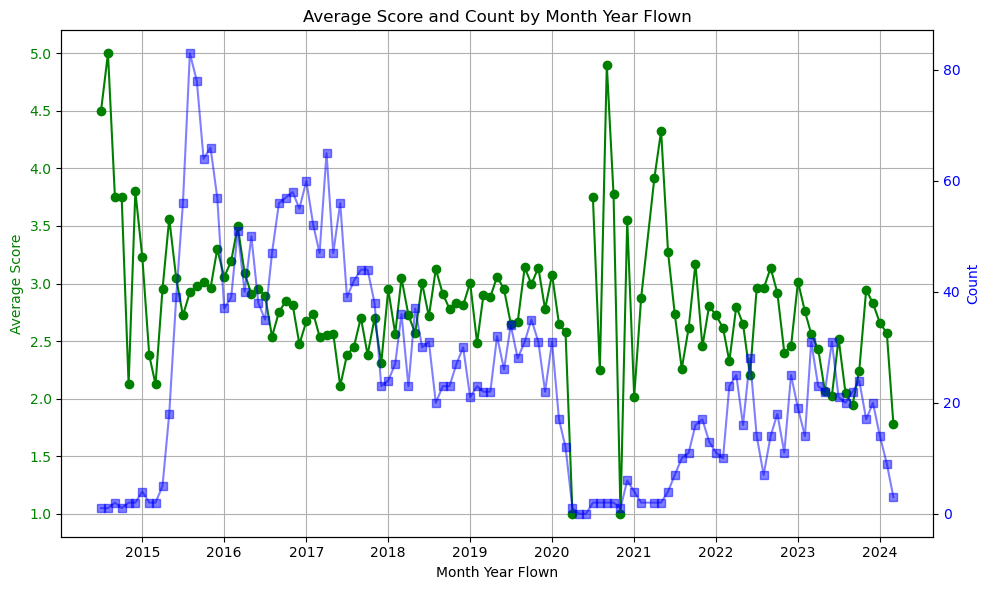

In [61]:
# Drop NaN values from the 'month_year_fly' column
df_filtered = df.dropna(subset=['month_year_fly'])

# Calculate the average score and count for each 'Month Year Flown'
average_score_and_count_by_month_year = df_filtered.groupby('month_year_fly')['score'].agg(['mean', 'count'])

# Sort the index to ensure the line plot is ordered by date
average_score_and_count_by_month_year = average_score_and_count_by_month_year.sort_index()

# Plot the average score for each date using a line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average score
color1 = 'green'
ax1.set_xlabel('Month Year Flown')
ax1.set_ylabel('Average Score', color=color1)
ax1.plot(average_score_and_count_by_month_year.index, average_score_and_count_by_month_year['mean'], color=color1, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for the count
ax2 = ax1.twinx()
color2 = 'blue'
ax2.set_ylabel('Count', color=color2)
ax2.plot(average_score_and_count_by_month_year.index, average_score_and_count_by_month_year['count'], color=color2, marker='s', linestyle='-', alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and rotate x-axis labels
plt.title('Average Score and Count by Month Year Flown')
plt.xticks(rotation=45)

# Add gridlines to the plot
ax1.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


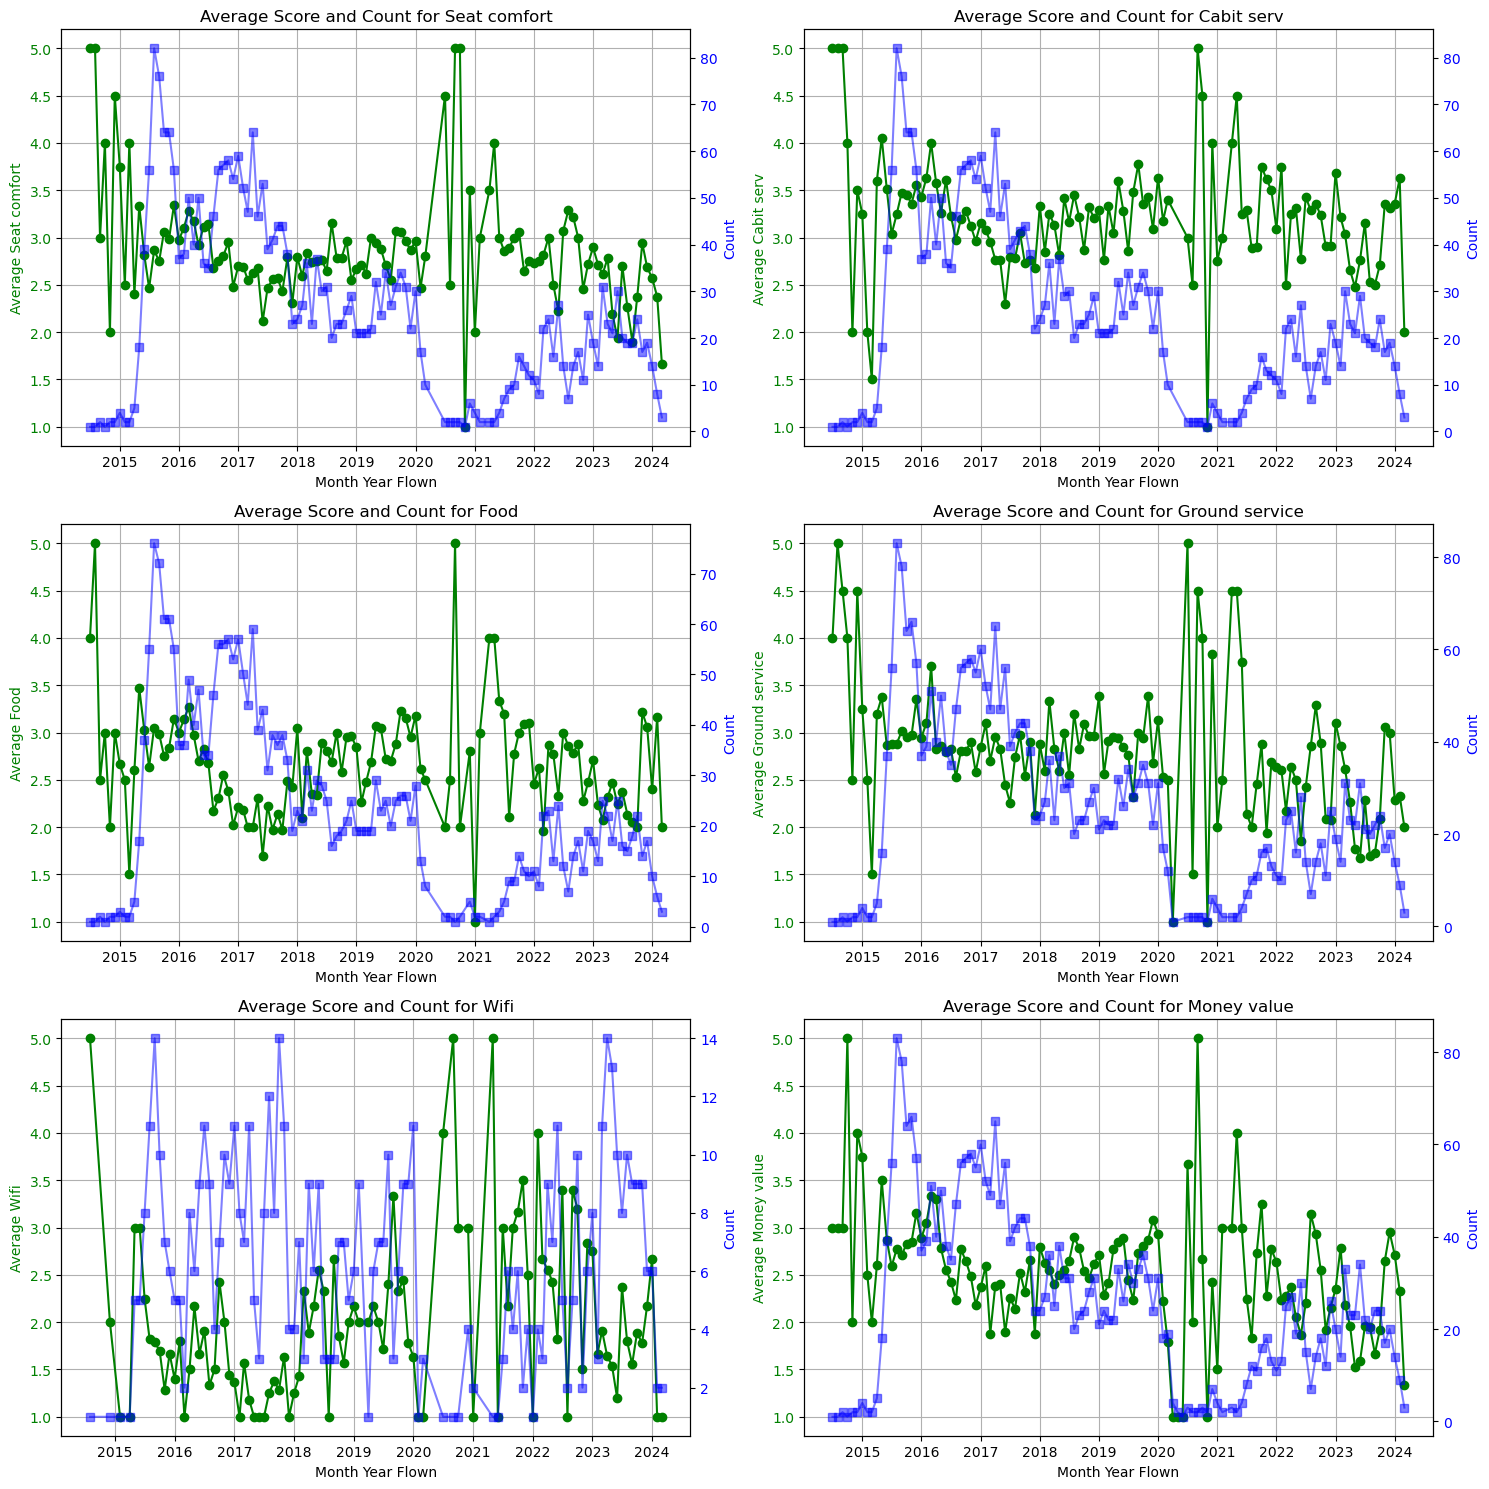

In [62]:
# Define the list of columns
columns_to_plot = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Iterate over each column and plot the average score and count by date flown
for i, column in enumerate(columns_to_plot):
    # Filter out NaN values in the specified column
    filtered_data = df.dropna(subset=['month_year_fly', column])
    
    # Group by 'Month Year Flown' to calculate the average and count
    average_score_and_count = filtered_data.groupby('month_year_fly')[column].agg(['mean', 'count'])
    average_score_and_count = average_score_and_count.sort_index()

    # Plot the average score for each date using a line plot
    color1 = 'green'
    axes[i].plot(average_score_and_count.index, average_score_and_count['mean'], marker='o', color=color1, linestyle='-')
    axes[i].set_xlabel('Month Year Flown')
    axes[i].set_ylabel('Average ' + column.replace("_", " ").capitalize(), color=color1)
    axes[i].tick_params(axis='y', labelcolor=color1)
    axes[i].grid(True)

    # Plot the count for each date using a line plot
    ax2 = axes[i].twinx()
    color2 = 'blue'
    ax2.plot(average_score_and_count.index, average_score_and_count['count'], color=color2, linestyle='-', marker='s', alpha=0.5)
    ax2.set_ylabel('Count', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    axes[i].set_title('Average Score and Count for ' + column.replace("_", " ").capitalize())

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Monthly Time Series

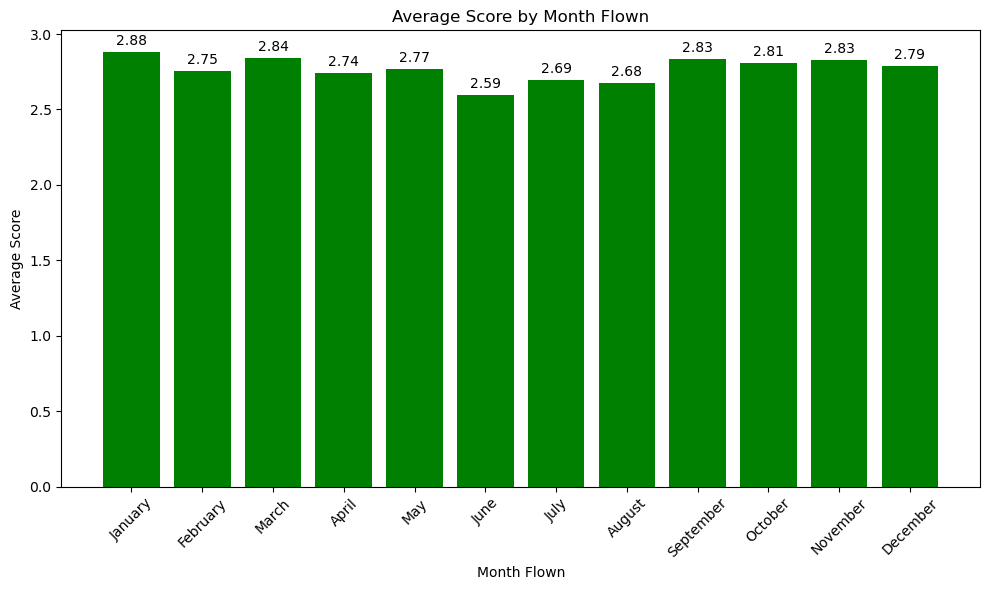

In [63]:
# Calculate the average score for each month
average_score_by_month = df.groupby('month_fly_num')['score'].mean()

# Sort the index to ensure the bar chart is ordered by month
average_score_by_month = average_score_by_month.sort_index()

# Get month names to use as labels
month_names = df.groupby('month_fly_num')['month_fly'].first()

# Plot the average score for each month using a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(month_names, average_score_by_month, color='green')
plt.xlabel('Month Flown')
plt.ylabel('Average Score')
plt.title('Average Score by Month Flown')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Add labels to the top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(round(height, 2)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


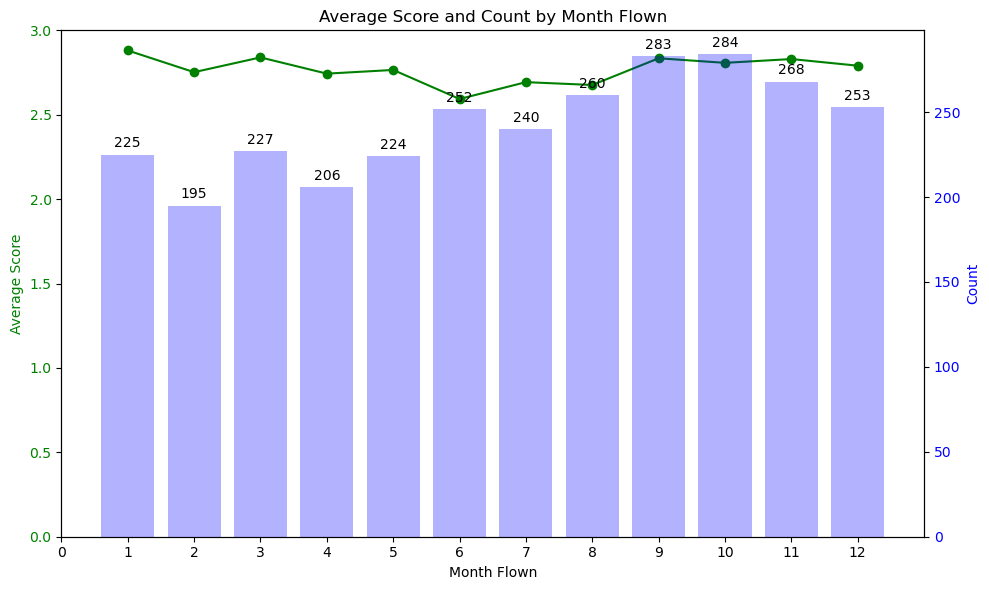

In [64]:
# Filter out NaN values from the 'Month Flown' column and calculate the average score and count for each month
average_score_and_count_by_month = df.dropna(subset=['month_fly_num']).groupby('month_fly_num')['score'].agg(['mean', 'count'])

# Sort the index to ensure the line plot is ordered by date
average_score_and_count_by_month = average_score_and_count_by_month.sort_index()

# Plot the average score for each date using a line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average score
color = 'green'
ax1.set_xlabel('Month Flown')
ax1.set_ylabel('Average Score', color=color)
ax1.plot(average_score_and_count_by_month.index, average_score_and_count_by_month['mean'], color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Set y-axis limit from 0 to 3
ax1.set_ylim(0, 3)

# Create a second y-axis for the count
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Count', color=color)
bars = ax2.bar(average_score_and_count_by_month.index, average_score_and_count_by_month['count'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Add labels to the top of the bars
for bar in bars:
    height = bar.get_height()
    ax2.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Add title and rotate x-axis labels
plt.title('Average Score and Count by Month Flown')
plt.xticks(range(13))  # Set x-axis ticks from 0 to 12
plt.xlim(0, 13)  # Set x-axis limit to start from 0 and end at 12

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

In [65]:
### Summer Month Seems to be a problem